In [5]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Loading MNIST dataset...
Training set: 44800 samples
Validation set: 11200 samples
Test set: 14000 samples

Initializing Neural Network...

Training Neural Network...
Epoch   0: Train Loss: 0.5123, Train Acc: 0.8624, Val Loss: 0.3122, Val Acc: 0.9121
Epoch  10: Train Loss: 0.1013, Train Acc: 0.9720, Val Loss: 0.1202, Val Acc: 0.9657
Epoch  20: Train Loss: 0.0561, Train Acc: 0.9856, Val Loss: 0.0958, Val Acc: 0.9714
Epoch  30: Train Loss: 0.0358, Train Acc: 0.9921, Val Loss: 0.0843, Val Acc: 0.9746
Epoch  40: Train Loss: 0.0243, Train Acc: 0.9957, Val Loss: 0.0820, Val Acc: 0.9759

Evaluating on test set...

=== FINAL RESULTS ===
Test Accuracy: 0.9760 (97.60%)
Test Loss: 0.0819

Final Training Accuracy: 0.9975 (99.75%)
Final Training Loss: 0.0176
Final Validation Accuracy: 0.9764 (97.64%)
Final Validation Loss: 0.0811


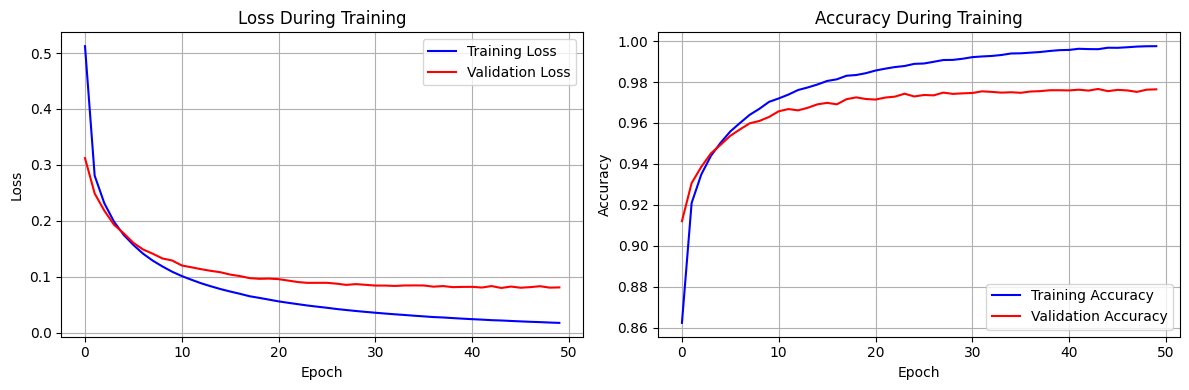


=== SAMPLE PREDICTIONS ===
Sample 1: Predicted: 6, True: 6 ✓
Sample 2: Predicted: 1, True: 1 ✓
Sample 3: Predicted: 5, True: 5 ✓
Sample 4: Predicted: 3, True: 5 ✗
Sample 5: Predicted: 7, True: 7 ✓
Sample 6: Predicted: 8, True: 8 ✓
Sample 7: Predicted: 3, True: 5 ✗
Sample 8: Predicted: 5, True: 5 ✓
Sample 9: Predicted: 9, True: 9 ✓
Sample 10: Predicted: 6, True: 6 ✓


In [19]:
#Design the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """
        Initialize neural network with random weights and biases
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights with Xavier initialization
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))

        # Lists to store metrics during training
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)

    def relu_derivative(self, x):
        """Derivative of ReLU function"""
        return (x > 0).astype(float)

    def softmax(self, x):
        """Softmax activation function"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward_propagation(self, X):
        """Forward pass through the network"""
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)

        return self.a2

    def compute_loss(self, y_true, y_pred):
        """Compute cross-entropy loss"""
        m = y_true.shape[0]
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.sum(y_true * np.log(y_pred)) / m
        return loss

    def backward_propagation(self, X, y_true):
        """Backward pass to compute gradients"""
        m = X.shape[0]

        # Output layer gradients
        dz2 = self.a2 - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Hidden layer gradients
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2):
        """Update weights and biases using gradient descent"""
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def predict(self, X):
        """Make predictions on new data"""
        predictions = self.forward_propagation(X)
        return np.argmax(predictions, axis=1)

    def accuracy(self, y_true, y_pred):
        """Calculate accuracy"""
        return np.mean(y_true == y_pred)

    def train(self, X_train, y_train, X_val, y_val, epochs=100, batch_size=128):
        """Train the neural network"""
        n_samples = X_train.shape[0]

        for epoch in range(epochs):
          # Shuffle training data
            indices = np.random.permutation(n_samples)
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train[indices]

            epoch_loss = 0
            epoch_accuracy = 0
            n_batches = 0
            # Mini-batch gradient descent
            for i in range(0, n_samples, batch_size):
                batch_end = min(i + batch_size, n_samples)
                X_batch = X_train_shuffled[i:batch_end]
                y_batch = y_train_shuffled[i:batch_end]

                # Forward propagation
                predictions = self.forward_propagation(X_batch)

                # Compute loss and accuracy
                loss = self.compute_loss(y_batch, predictions)
                pred_labels = np.argmax(predictions, axis=1)
                true_labels = np.argmax(y_batch, axis=1)
                acc = self.accuracy(true_labels, pred_labels)

                epoch_loss += loss
                epoch_accuracy += acc
                n_batches += 1

                # Backward propagation and parameter update
                dW1, db1, dW2, db2 = self.backward_propagation(X_batch, y_batch)
                self.update_parameters(dW1, db1, dW2, db2)

            # Calculate average metrics for the epoch
            avg_train_loss = epoch_loss / n_batches
            avg_train_acc = epoch_accuracy / n_batches

            # Validation metrics
            val_predictions = self.forward_propagation(X_val)
            val_loss = self.compute_loss(y_val, val_predictions)
            val_pred_labels = np.argmax(val_predictions, axis=1)
            val_true_labels = np.argmax(y_val, axis=1)
            val_acc = self.accuracy(val_true_labels, val_pred_labels)

            # Store metrics
            self.train_losses.append(avg_train_loss)
            self.train_accuracies.append(avg_train_acc)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_acc)

            if epoch % 10 == 0:
                print(f"Epoch {epoch:3d}: Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}, "
                      f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

def one_hot_encode(y, num_classes):
    """Convert labels to one-hot encoding"""
    encoded = np.zeros((len(y), num_classes))
    encoded[np.arange(len(y)), y] = 1
    return encoded

def load_and_preprocess_mnist():
    """Load and preprocess MNIST dataset"""
    print("Loading MNIST dataset...")
    # Load MNIST dataset
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
    X, y = mnist.data, mnist.target.astype(int)

    # Normalize pixel values to [0, 1]
    X = X / 255.0

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Further split training data for validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

    # One-hot encode labels
    y_train_onehot = one_hot_encode(y_train, 10)
    y_val_onehot = one_hot_encode(y_val, 10)
    y_test_onehot = one_hot_encode(y_test, 10)

    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

    return X_train, X_val, X_test, y_train_onehot, y_val_onehot, y_test_onehot, y_train, y_val, y_test

def plot_training_history(nn):
    """Plot training and validation metrics"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
#Visualize the model
 # Plot loss
    ax1.plot(nn.train_losses, label='Training Loss', color='blue')
    ax1.plot(nn.val_losses, label='Validation Loss', color='red')
    ax1.set_title('Loss During Training')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot accuracy
    ax2.plot(nn.train_accuracies, label='Training Accuracy', color='blue')
    ax2.plot(nn.val_accuracies, label='Validation Accuracy', color='red')
    ax2.set_title('Accuracy During Training')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def main():
    """Main function to run the neural network training and evaluation"""
     # Load and preprocess data
    X_train, X_val, X_test, y_train_onehot, y_val_onehot, y_test_onehot, y_train, y_val, y_test = load_and_preprocess_mnist()

    # Initialize neural network
    print("\nInitializing Neural Network...")
    nn = NeuralNetwork(
        input_size=784,  # 28x28 pixels
        hidden_size=128,  # Hidden layer size
        output_size=10,   # 10 classes (digits 0-9)
        learning_rate=0.1
    )

    # Train the network
    print("\nTraining Neural Network...")
    nn.train(X_train, y_train_onehot, X_val, y_val_onehot, epochs=50, batch_size=128)

    # Evaluate on test set
    print("\nEvaluating on test set...")
    test_predictions = nn.predict(X_test)
    test_accuracy = nn.accuracy(y_test, test_predictions)

    # Calculate final loss on test set
    test_probs = nn.forward_propagation(X_test)
    test_loss = nn.compute_loss(y_test_onehot, test_probs)

    print(f"\n=== FINAL RESULTS ===")
    print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"Test Loss: {test_loss:.4f}")

    # Training results
    final_train_acc = nn.train_accuracies[-1]
    final_train_loss = nn.train_losses[-1]
    final_val_acc = nn.val_accuracies[-1]
    final_val_loss = nn.val_losses[-1]

    print(f"\nFinal Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

    # Plot training history
    plot_training_history(nn)

    # Show some example predictions
    print("\n=== SAMPLE PREDICTIONS ===")
    sample_indices = np.random.choice(len(X_test), 10, replace=False)
    sample_predictions = nn.predict(X_test[sample_indices])
    sample_true = y_test[sample_indices]

    for i, (pred, true) in enumerate(zip(sample_predictions, sample_true)):
        status = "✓" if pred == true else "✗"
        print(f"Sample {i+1}: Predicted: {pred}, True: {true} {status}")

    return nn, test_accuracy, test_loss

if __name__ == "__main__":
    # Run the complete neural network training and evaluation
    neural_network, accuracy, loss = main()